In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
student_data = pd.read_csv('raw_students_performance_data.csv')

**Data Processing**

In [ ]:
#Check for null values
student_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Create a new columns named 'total_score' and 'avg_score'
student_data['total_score'] = student_data['math score'] + student_data['reading score'] + student_data['writing score']

student_data['avg_score'] = (student_data['total_score']/3).round(2)
print(student_data.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  avg_score  
0          218      72.67  
1          247      82.33  
2          278      92.67  
3          148      49.33  
4          2

In [ ]:
student_data.to_csv('clean_students_performance_data.csv',index=False)

**Visualizations**

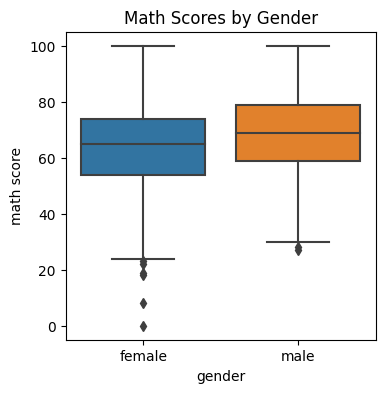

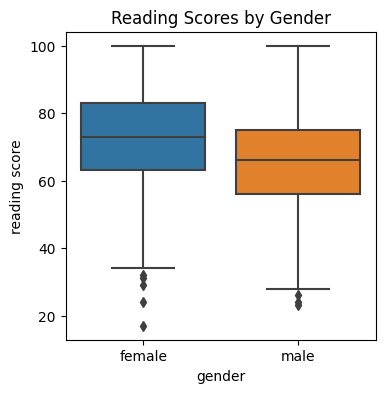

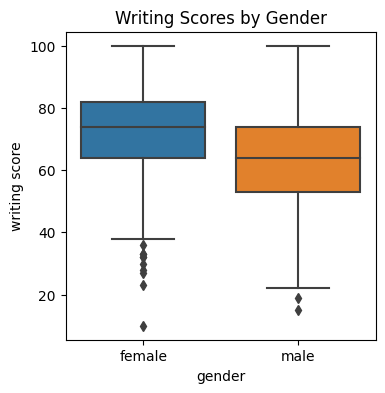

In [ ]:
# Exam Scores by Gender
plt.figure(figsize=(4, 4))

sns.boxplot(x='gender', y='math score', data=student_data)
plt.title('Math Scores by Gender')

plt.figure(figsize=(4, 4))
sns.boxplot(x='gender', y='reading score', data=student_data)
plt.title('Reading Scores by Gender')

plt.figure(figsize=(4, 4))
sns.boxplot(x='gender', y='writing score', data=student_data)
plt.title('Writing Scores by Gender')

plt.show()


<ipython-input-48-35fa075b06e4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data_encoded.corr()


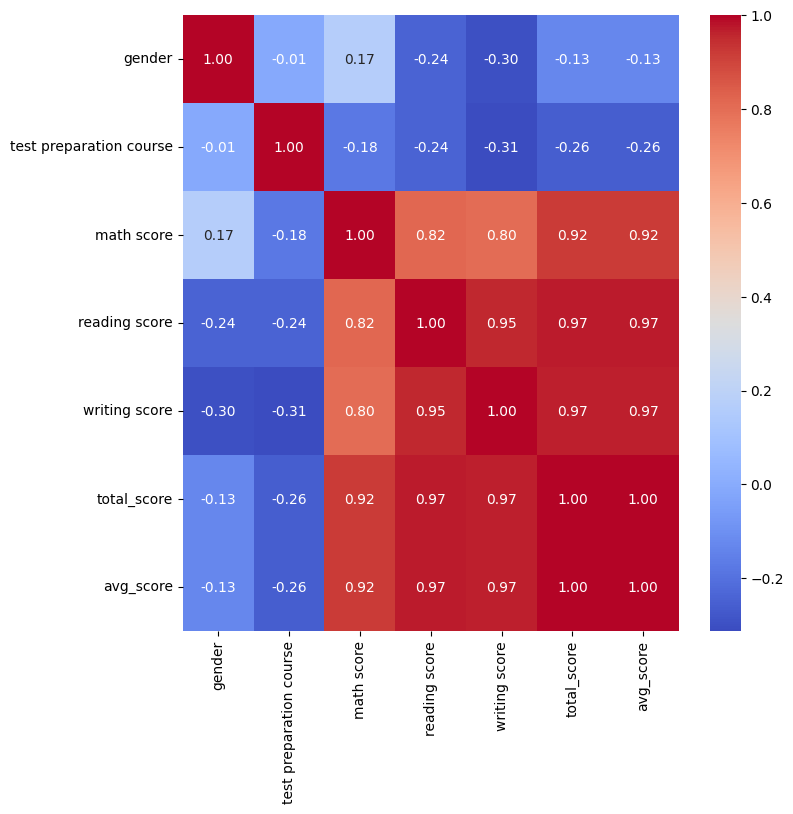

In [ ]:
label = LabelEncoder()
data_encoded = student_data
data_encoded ['test preparation course']=label.fit_transform(data_encoded ['test preparation course'])
data_encoded['gender']=label.fit_transform(data_encoded['gender'])
# Compute the correlation matrix
data = data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(8, 8))

sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

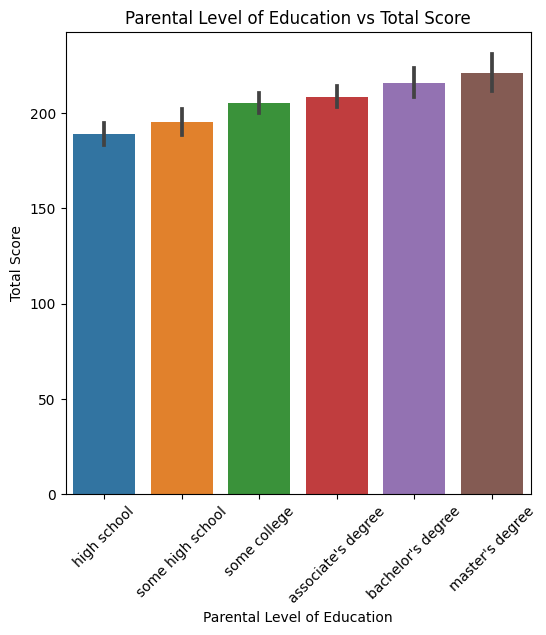

In [ ]:
# Parental Level of Education vs Total Score
plt.figure(figsize=(6, 6))
sns.barplot(x='parental level of education', y='total_score', data=student_data,
            order=student_data.groupby('parental level of education')['total_score'].mean().sort_values().index)
plt.title('Parental Level of Education vs Total Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()


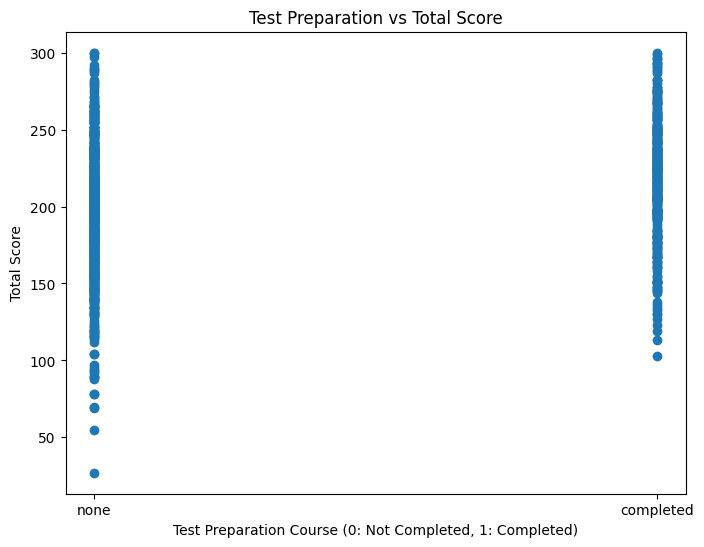

In [ ]:
# Encode 'test preparation course' as numerical values
data['test preparation course'] = student_data['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)

# Scatter Plot for Test Preparation vs Total Score
plt.figure(figsize=(8, 6))
plt.scatter(student_data['test preparation course'], student_data['total_score'])
plt.title('Test Preparation vs Total Score')
plt.xlabel('Test Preparation Course (0: Not Completed, 1: Completed)')
plt.ylabel('Total Score')
plt.show()


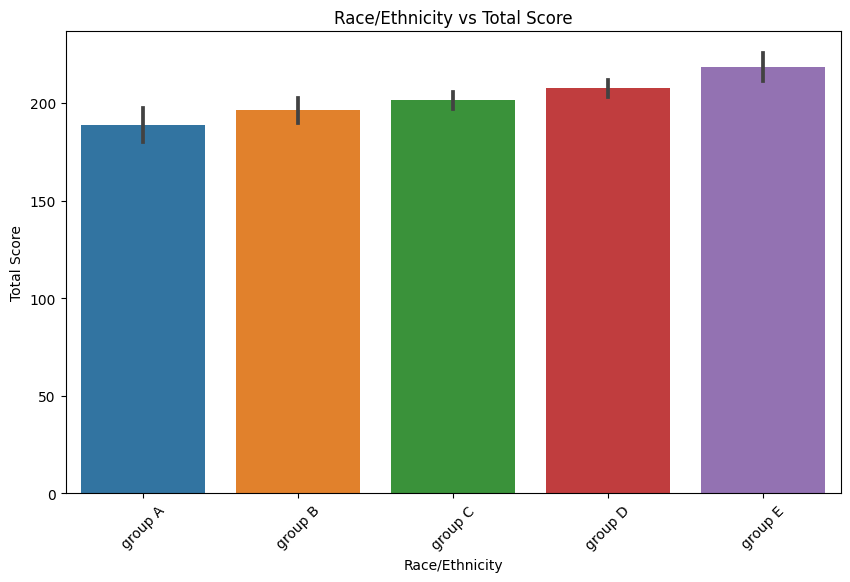

In [ ]:
# Race/Ethnicity vs Total Score
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='total_score', data=student_data,
            order=student_data.groupby('race/ethnicity')['total_score'].mean().sort_values().index)
plt.title('Race/Ethnicity vs Total Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()
